<a href="https://colab.research.google.com/github/zainabbio/Youtube-Tutorials/blob/main/Plotting_in_R_with_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Plotting with ggplot2**

In R, besides the basic plotting system, there's another popular one called **ggplot2**, which uses a different approach known as the **"grammar of graphics."** This system builds a plot by combining different components. For example, in a scatter plot, the points are geometric shapes, and the plot also includes data scales, coordinates, and transformations. In a histogram, the data is grouped into bins before being displayed as bars.

To create a plot with **ggplot2**, you need:
1. **Data**: The first component is your data and how it's transformed (e.g., mapping to points for scatter plots or bins for histograms).
2. **Scales and Coordinates**: These define the axes and legends.
3. **Annotations**: These include things like titles and background.

The main function in **ggplot2** is **ggplot()**, which takes a data frame as its first argument. The **aes()** function inside it maps the data to visual elements like x/y coordinates or colors. The **geom_point()** function is used to create scatter plot points. You can add more layers or modify the plot using the **+** sign.

This approach allows you to build and customize plots step by step.

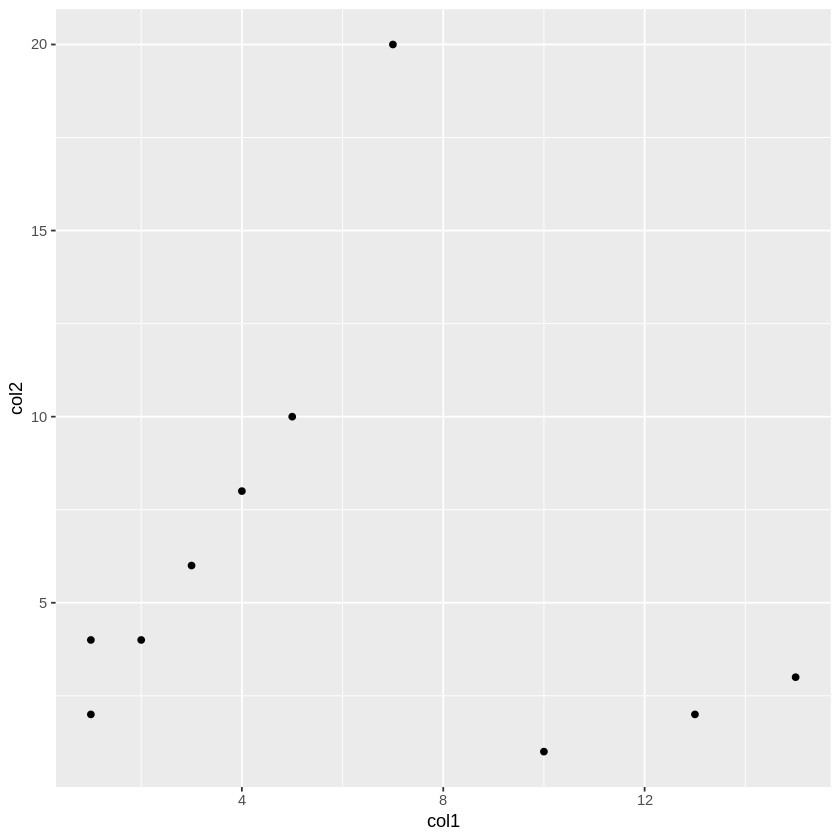

In [ ]:
# Load ggplot2 library
library(ggplot2)

# Create a simple dataset
x <- c(1, 2, 3, 4, 5, 7, 10, 13, 15, 1)  # X values
y <- c(2, 4, 6, 8, 10, 20, 1, 2, 3, 4)  # Y values

# Create a data frame from the x and y vectors
myData <- data.frame(col1 = x, col2 = y)

# Create a ggplot scatter plot using col1 and col2
ggplot(myData, aes(x = col1, y = col2)) +
  geom_point()  # Map x and y as points

To recreate the histogram, we'll use the ggplot() function with one column of data for the x-axis. Then, we'll add the histogram layer with geom_histogram(). To customize the plot, we’ll use labs() to add axis labels and a title. Here's how:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


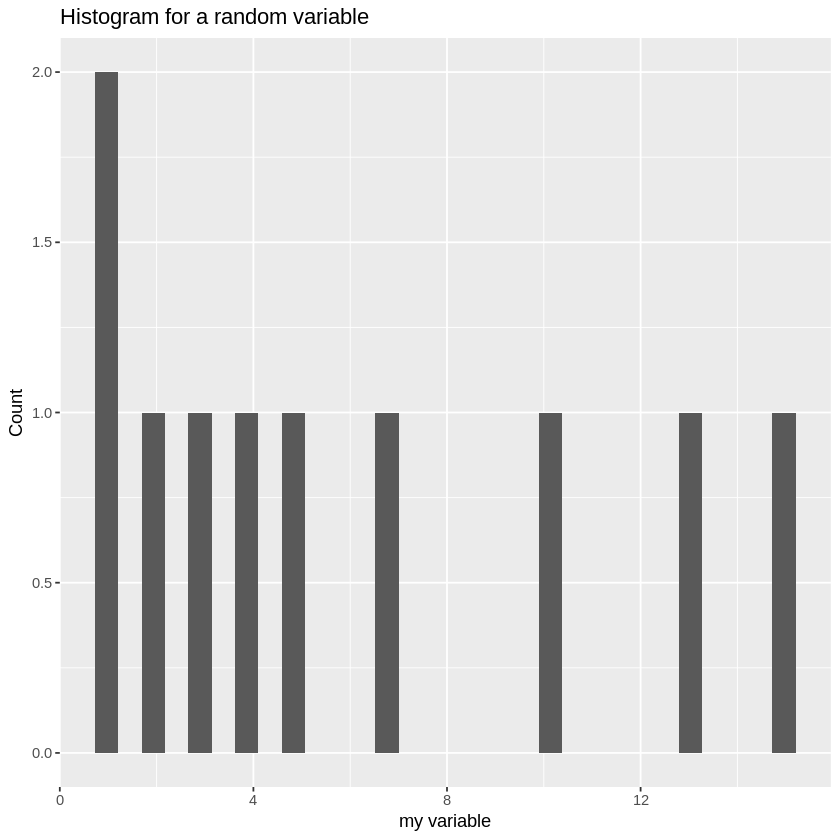

In [ ]:
ggplot(myData, aes(x=col1)) +
  geom_histogram() + # map x and y as points
  labs(title="Histogram for a random variable", x="my variable", y="Count")

To create a boxplot with ggplot2, we need to organize our data into a data frame with one column for the groups and another for the numeric values. Here's how you can do it:

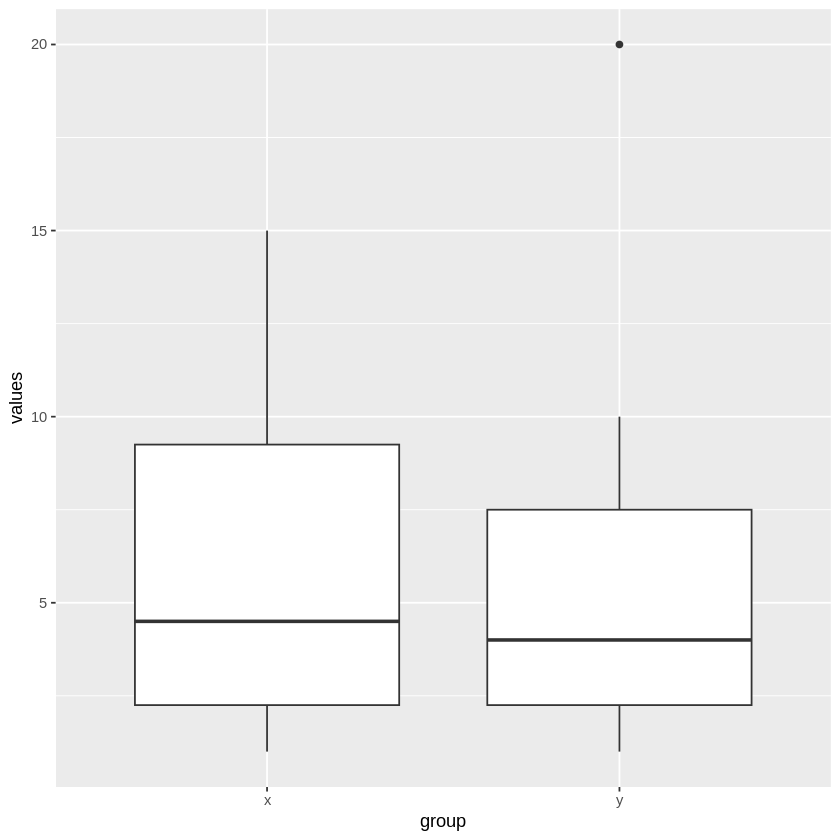

In [ ]:
# data frame with group column showing which
# groups the vector x and y belong
myData2=rbind(data.frame(values=x,group="x"),
              data.frame(values=y,group="y"))

# x-axis will be group and y-axis will be values
ggplot(myData2, aes(x=group,y=values)) +
         geom_boxplot()

# **Combining multiple plots**

To combine multiple plots, we can use faceting in ggplot2, which splits the plot into subsets based on a factor (like groups). This is done with the facet_grid() function.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


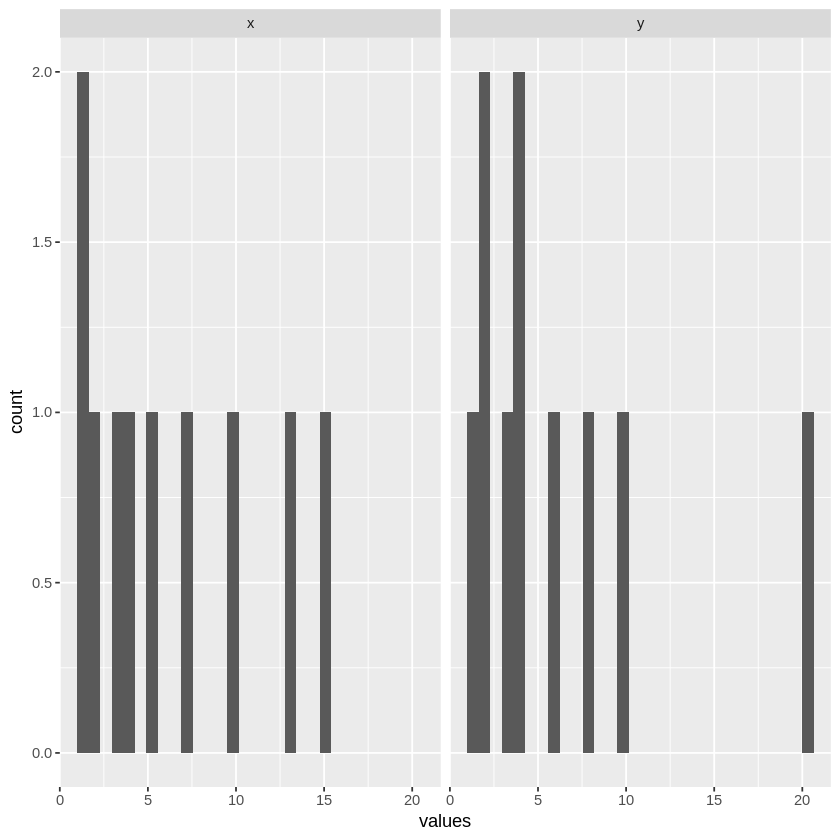

In [ ]:
ggplot(myData2, aes(x=values)) +
         geom_histogram() +facet_grid(.~group)

To combine different types of plots, like a histogram and a scatter plot, you can use the cowplot package in ggplot2. This package allows you to align plots in a grid, making it easy to create compound plots. Here's how you can combine a histogram and scatter plot:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


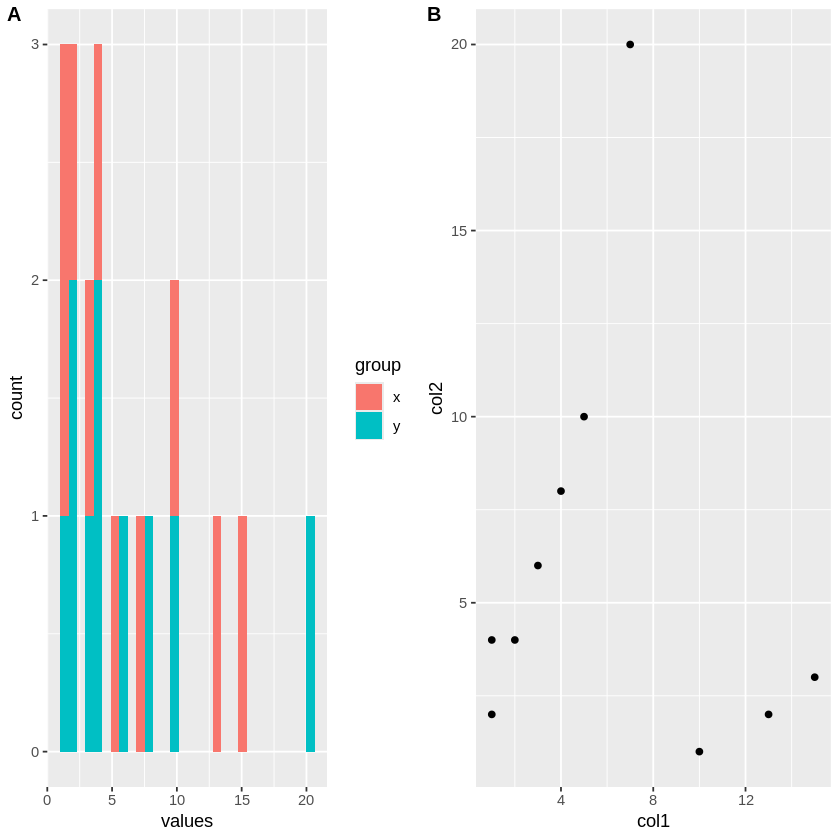

In [ ]:
install.packages("cowplot")
library(cowplot)
# histogram
p1 <- ggplot(myData2, aes(x=values,fill=group)) +
        geom_histogram()
# scatterplot
p2 <- ggplot(myData, aes(x=col1, y=col2)) +
  geom_point()

# plot two plots in a grid and label them as A and B
plot_grid(p1, p2, labels = c('A', 'B'), label_size = 12)

# **ggplot2 and tidyverse**

ggplot2 is part of the larger tidyverse ecosystem. To make more advanced plots, you may need to use additional packages like dplyr for data manipulation, tidyr for data reshaping, and stringr for working with strings. These packages help format data and enhance the functionality of ggplot2 for more complex tasks, beyond what base R offers.

In [ ]:
metadata <- read.csv("http://www.datacarpentry.org/R-genomics/data/Ecoli_metadata.csv")

In [ ]:
head(metadata)

,sample,generation,clade,strain,cit,run,genome_size
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,REL606,0,NA,REL606,unknown,,4.62
2,REL1166A,2000,unknown,REL606,unknown,SRR098028,4.63
3,ZDB409,5000,unknown,REL606,unknown,SRR098281,4.60
4,ZDB429,10000,UC,REL606,unknown,SRR098282,4.59
5,ZDB446,15000,UC,REL606,unknown,SRR098283,4.66
6,ZDB458,20000,"(C1,C2)",REL606,unknown,SRR098284,4.63


In [ ]:
genome_size <- metadata$genome_size

# **Scatterplot**

R provides several basic graphing tools like histograms, scatter plots, bar charts, and boxplots. Let's try creating a few of these plots using the genome_size data from our dataset.

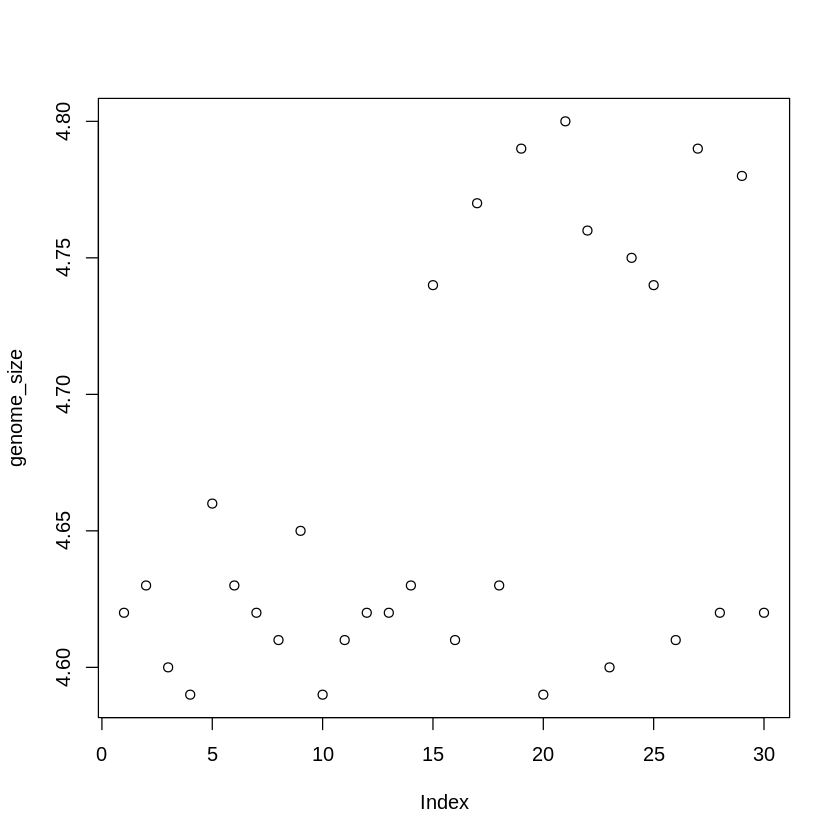

In [ ]:
plot(genome_size)

Each point represents a clone and the value on the x-asis is the clone index in the file, the y-axi corr. to the genome size for the clone

For any plot you can customize aspects (fonts, axes, titles) through graphic options.

E.g. we can change the shape of the data point using pch

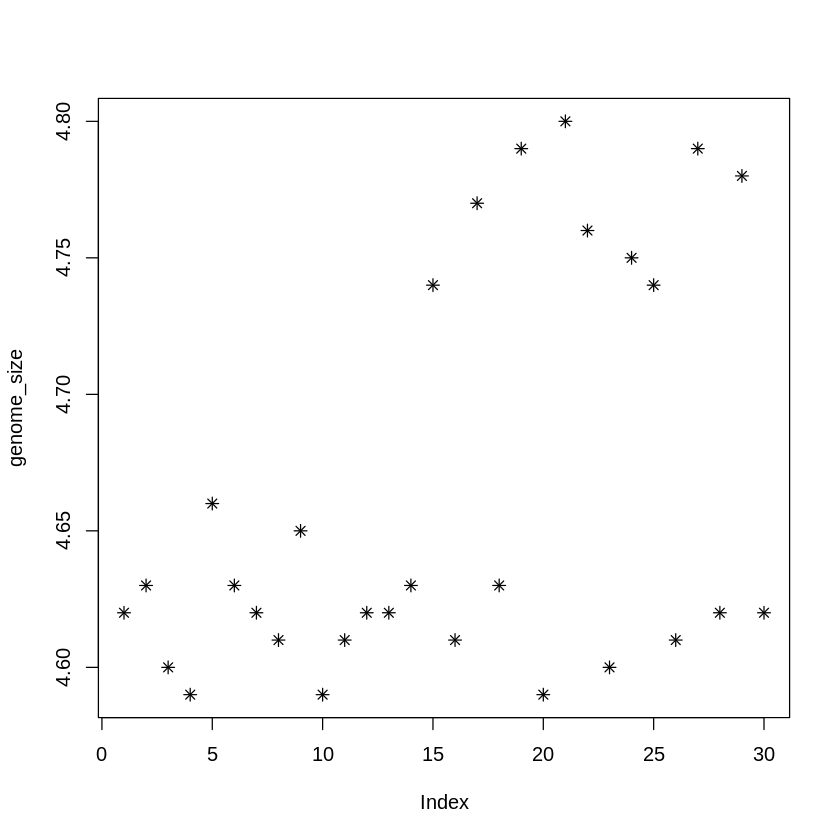

In [ ]:
plot(genome_size, pch = 8)

We can add a title to the plot by assigning a string to main:

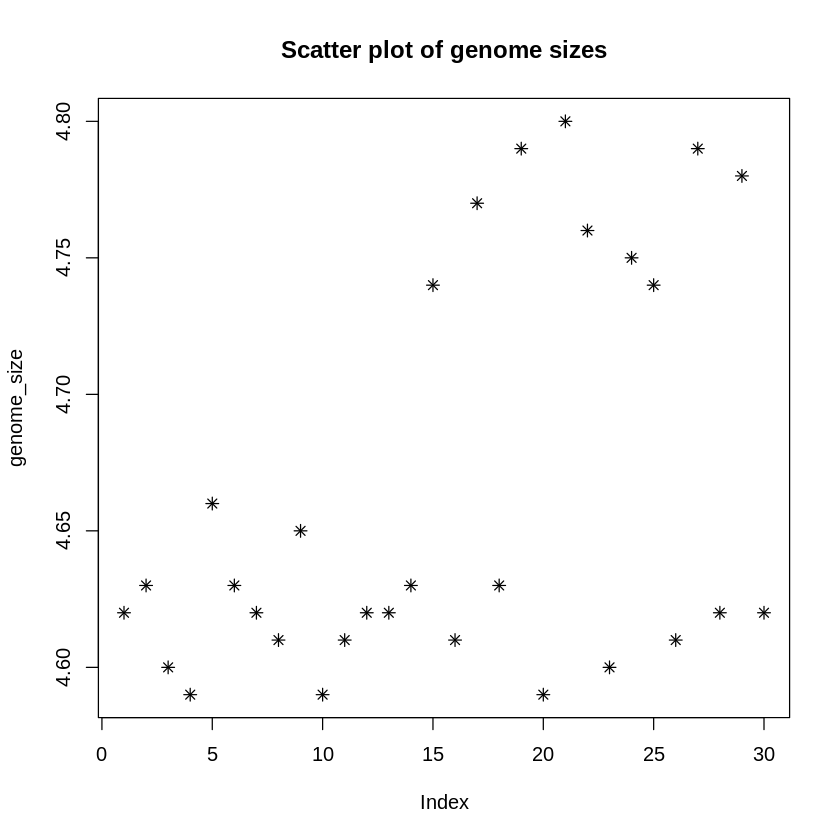

In [ ]:
plot(genome_size, pch = 8, main = "Scatter plot of genome sizes")

# **Histogram**
Another way to visualize the distribution of genome sizes is to use a historgram.

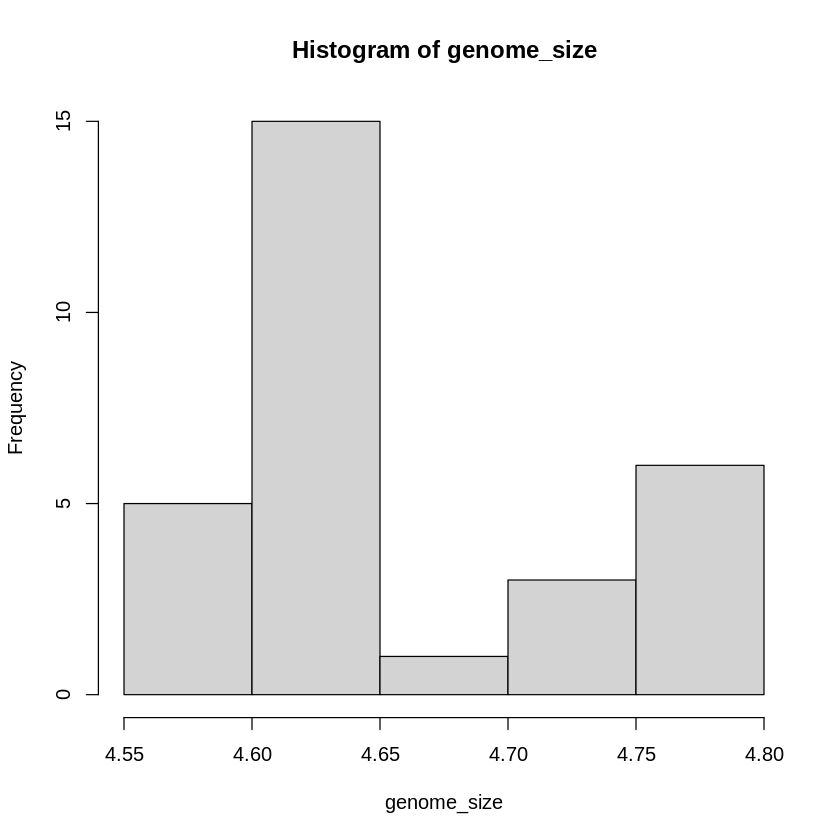

In [ ]:
hist(genome_size)

## **Boxplot**

We can use plots to compare values between different citrate mutant status using boxplot.

Boxplotp provides a graphcia view of the median, quartiles, maximum, and min of a data set.

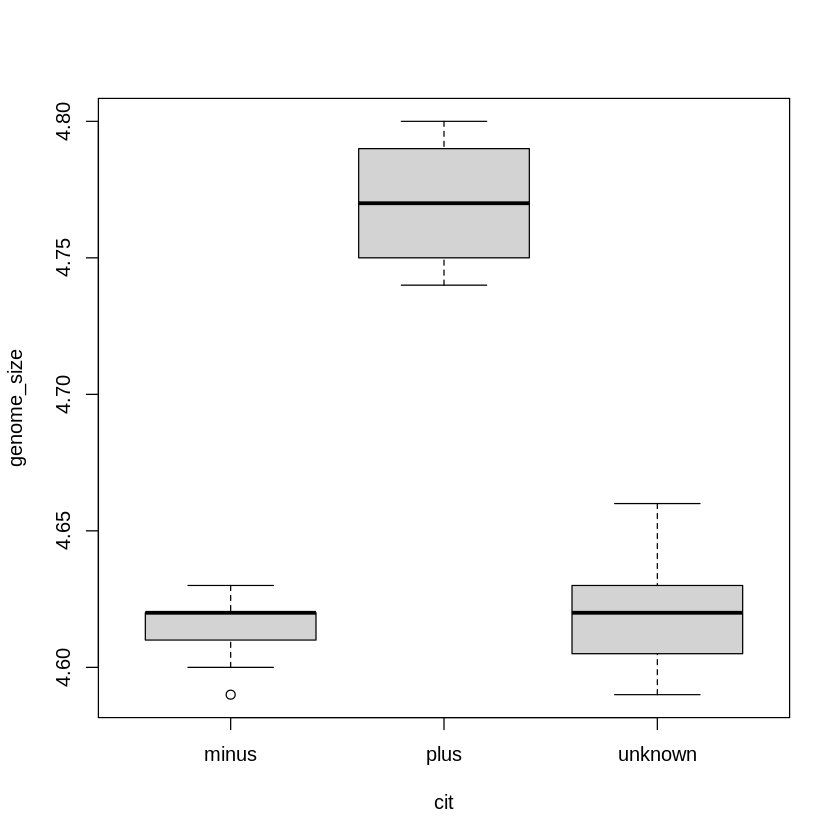

In [ ]:
boxplot(genome_size ~ cit, metadata)

we can pass in arguments to add in extras like plot title, axis labels, and colors

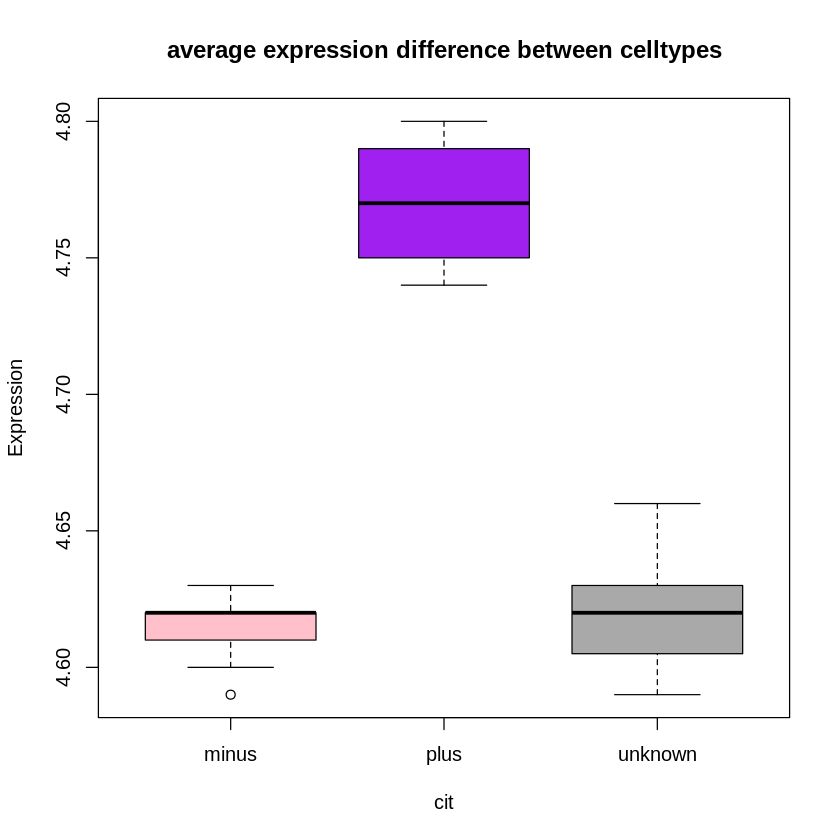

In [ ]:
boxplot(genome_size ~ cit, metadata, col = c("pink", "purple", "darkgrey"),
    main = "average expression difference between celltypes", ylab = "Expression")

## **ggplot2**

ggplot function is used to initialize the basic graph structure, then we add to it

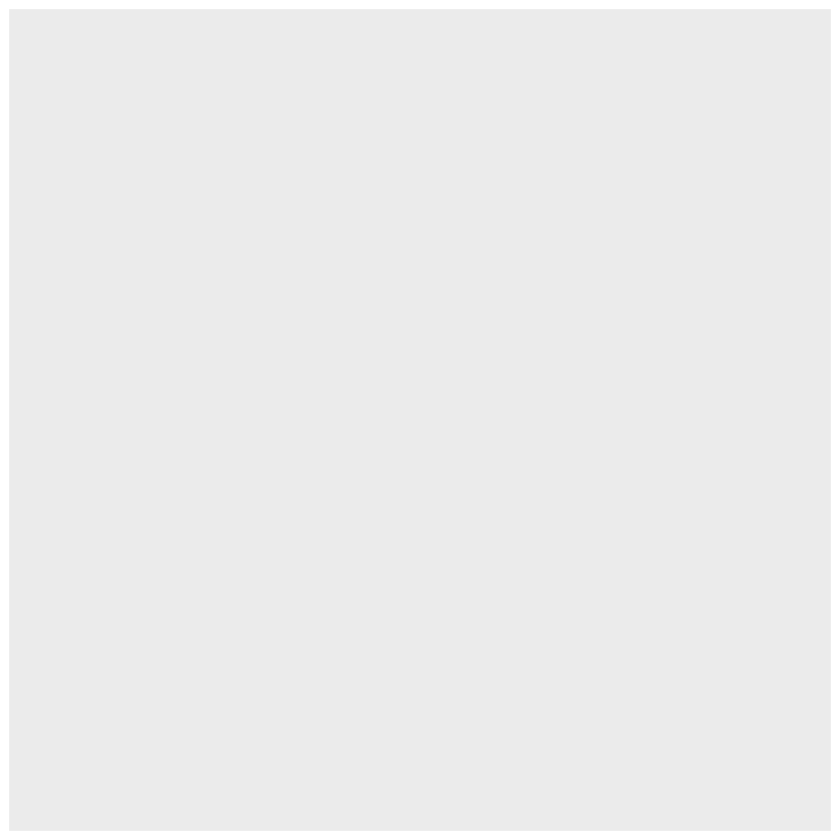

In [ ]:
ggplot(metadata)

Geometric objects are the shapes or marks we use in a plot. Examples include:

Points (using geom_point, for scatter plots or dot plots)

Lines (using geom_line, for time series or line charts)

Boxplots (using geom_boxplot)

Every plot needs at least one geometric object, and you add them using the + sign.

ggplot(metadata) + geom_point()

 Each type of geom has required set of aesthetics to be set

Usually accepts only a subset of all aesthetics - refer to geom help for details

Aesthetics mappings are set with the aes() function

Example:

position (i.e. on the x and y axes)

color (‘outside’ color)

fill (‘inside’ color)

shape (of points)

linetype

size

Let’s add position for the x and y axis since geom_point requires mappings for x and y.

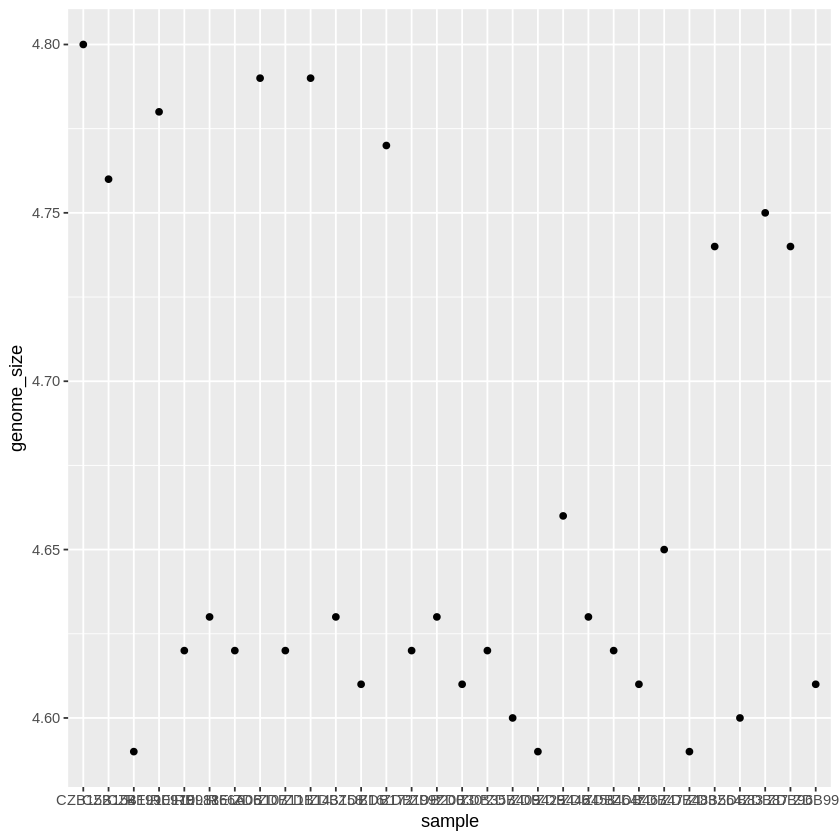

In [ ]:
ggplot(metadata) + geom_point(aes(x = sample, y = genome_size))

The labels on the x-axis are quite hard to read. Let us change that. To do this we need to add an additional theme layer.

In ggplot theme system handles non-data plot elements such as:

Axis labels

Plot background

Facet label background

Legend appearance

There are built in themes we can use or we can adjust elements.
for our plot let’s change the x-axis labels to be plotted on a 45 degree angle
we will add some additional aesthetics by mapping them to variables in our dataframe

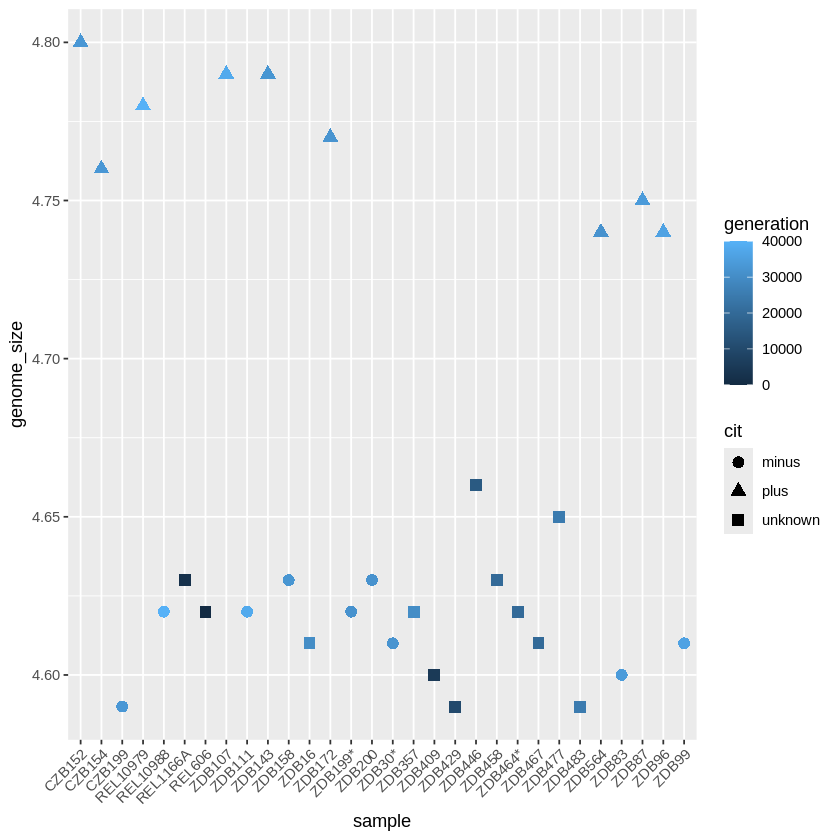

In [ ]:
ggplot(metadata) + geom_point(aes(x = sample, y = genome_size, color = generation,
    shape = cit), size = rel(3)) + theme(axis.text.x = element_text(angle = 45,
    hjust = 1))

The color of the points shows the number of generations, and the shape of the points indicates whether it's a citrate mutant or not.


You can adjust the size of the points within geom_point, but you don’t need to include it in aes() because size is not linked to a variable.

# **Histogram**

To plot a histogram, we need geom_bar which requires a statistical transformation.

Some plot types (such as scatterplots) do not require a transformation - each point is plotted by x and y.

Plots such as boxplot, histograms, prediction lines, etc. need to transformed.

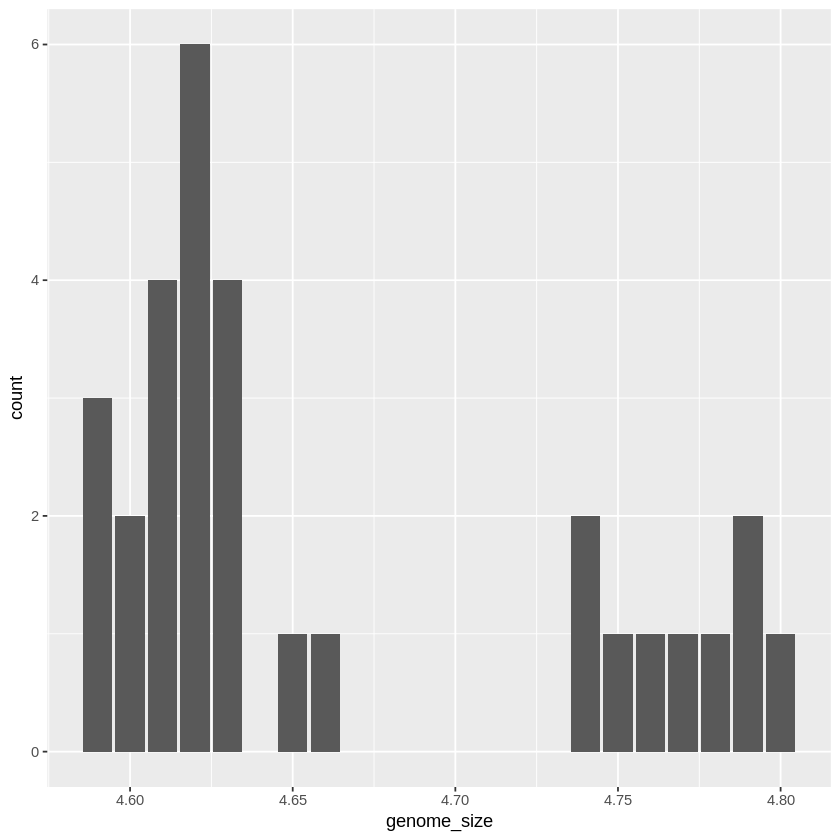

In [ ]:
ggplot(metadata) + geom_bar(aes(x = genome_size))

Let’s specify a binwidth.

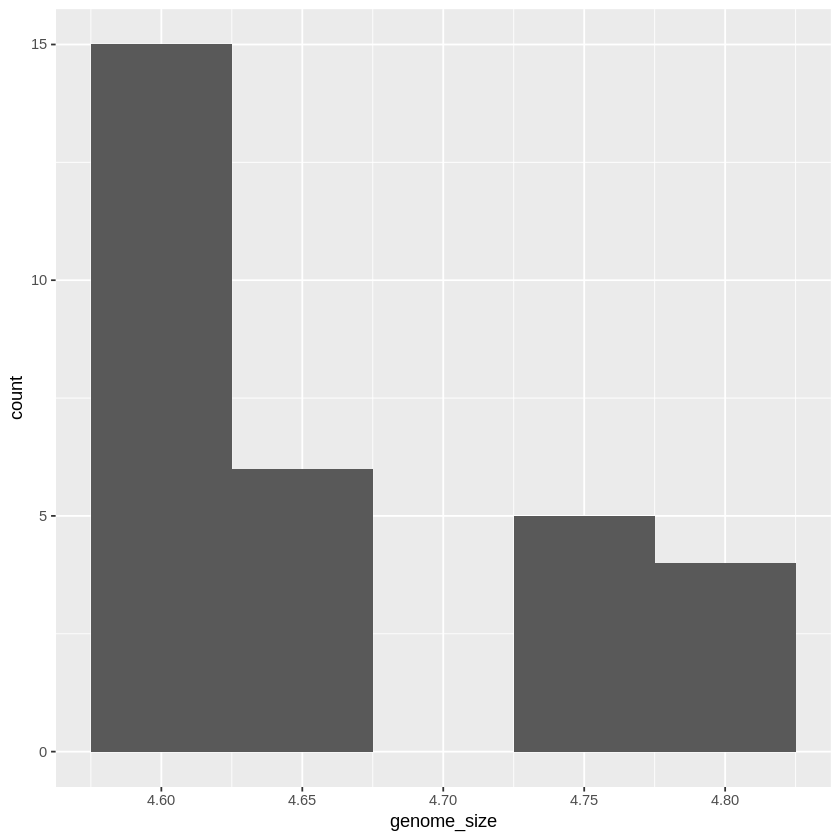

In [ ]:
ggplot(metadata) + geom_bar(aes(x = genome_size), stat = "bin", binwidth = 0.05)

# **Boxplot**
Let’s try plotting a boxplot similar to what we had using base R.
We can add some additional layers: plot title, axis labels

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


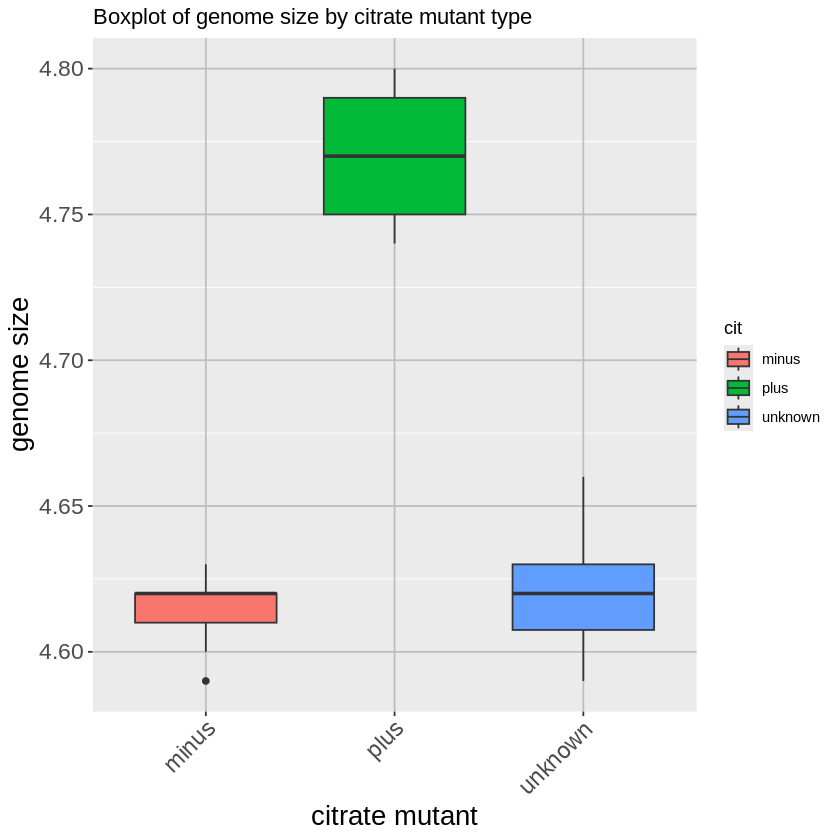

In [ ]:
ggplot(metadata) + geom_boxplot(aes(x = cit, y = genome_size, fill = cit)) +
    ggtitle("Boxplot of genome size by citrate mutant type") + xlab("citrate mutant") +
    ylab("genome size") + theme(panel.grid.major = element_line(size = 0.5,
    color = "grey"), axis.text.x = element_text(angle = 45, hjust = 1), axis.title = element_text(size = rel(1.5)),
    axis.text = element_text(size = rel(1.25)))

# **Advance Plotting using ggplot2**

Exploratory Data Analysis (EDA) focuses on using visualizations to understand and explore your data.

In ggplot2, plots are made by adding layers. These layers can adjust the appearance (like color and shape) of data points, apply statistical transformations, and change the axes or color scales.

In [ ]:
d <- read.csv("https://raw.githubusercontent.com/vsbuffalo/bds-files/master/chapter-08-r/Dataset_S1.txt")

Let's create a scatterplot of nucleotide diversity along the chromosome using the diversity column in our data frame, d. Before we plot, we need to prepare the data:

1) Add a "position" column: We'll create a new column called position, which will represent the midpoint between each window in the dataset.

2) Scale the diversity values: The diversity estimates (Theta, Pi, and Heterozygosity) in the dataset are multiplied by 10. We will use the Pi column for plotting, but to make the values more accurate, we'll scale them down to the per basepair nucleotide diversity.

3) Add the centromere data: We need to include the cent column, which indicates whether a window is within a centromeric region. This column contains TRUE or FALSE values, and we'll add it by comparing the window locations using logical operations.

In [ ]:
# fixing the colnames to 'percent.GC' from X.GC
colnames(d)[12] <- "percent.GC"
# diversity estimate scaled
d$diversity <- d$Pi/(10 * 1000)  # rescale, removing 10x and making per bp
summary(d$diversity)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0005577 0.0010416 0.0012388 0.0016880 0.0265283 

In [ ]:
# position -midpoint b/t start and end
d$position <- (d$end + d$start)/2
# add logical for whether window is in a centromeric region
d$cent <- d$start >= 25800000 & d$end <= 29700000

Plotting

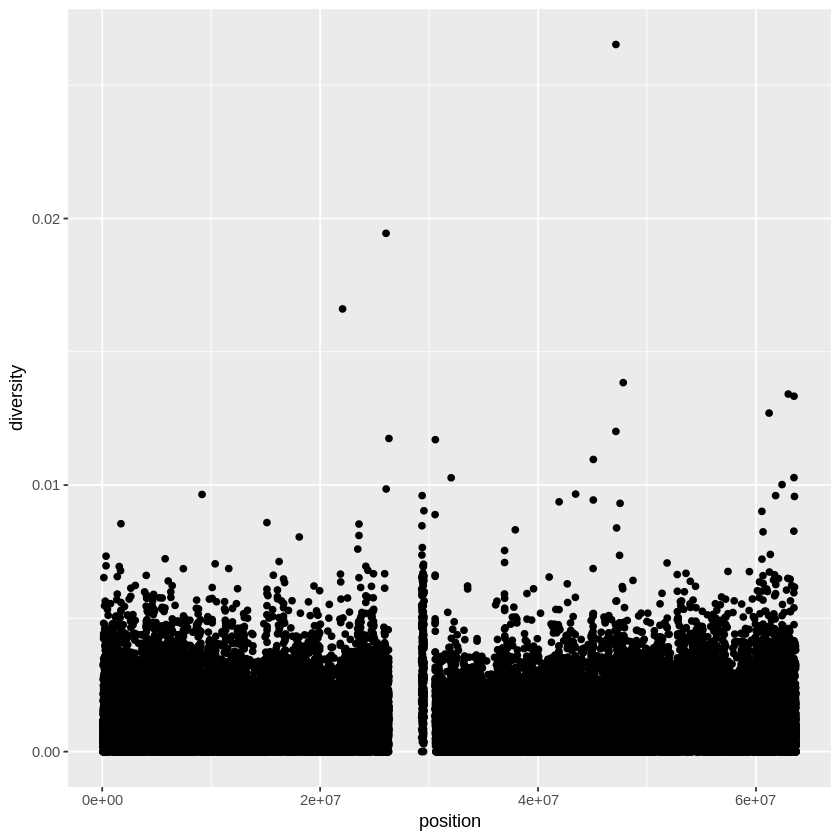

In [ ]:
ggplot(d) + geom_point(aes(x = position, y = diversity))

The beauty of ggplot2’s grammar lies in how it allows you to map the aesthetics (such as color, size, shape) of geometric objects (like points or lines) to columns in your dataframe.

For our scatterplot of diversity by position, we mapped the x-position aesthetic to the position column and the y-position aesthetic to the diversity column. This mapping is done using the aes() function.

To add labels to the axes, we can use xlab() and ylab() functions. Here’s how you can add custom labels to the axes:

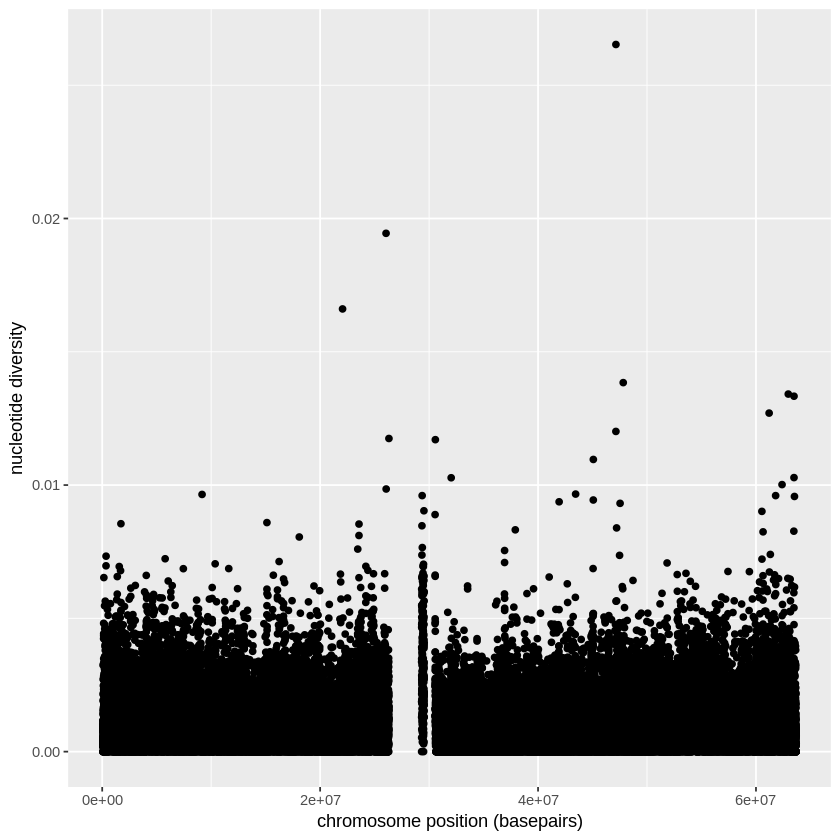

In [ ]:
ggplot(d) + geom_point(aes(x = position, y = diversity)) + xlab("chromosome position (basepairs)") +
    ylab("nucleotide diversity")

You can control the limits of continuous axes in ggplot2 by using scale_x_continuous(limits=c(start, end)) for the x-axis, and scale_y_continuous(limits=c(start, end)) for the y-axis.

If you want to change an axis to a log10 scale, use scale_x_log10() for the x-axis and scale_y_log10() for the y-axis.

ggplot2 also offers many other options for scaling axes, color scales, and more.

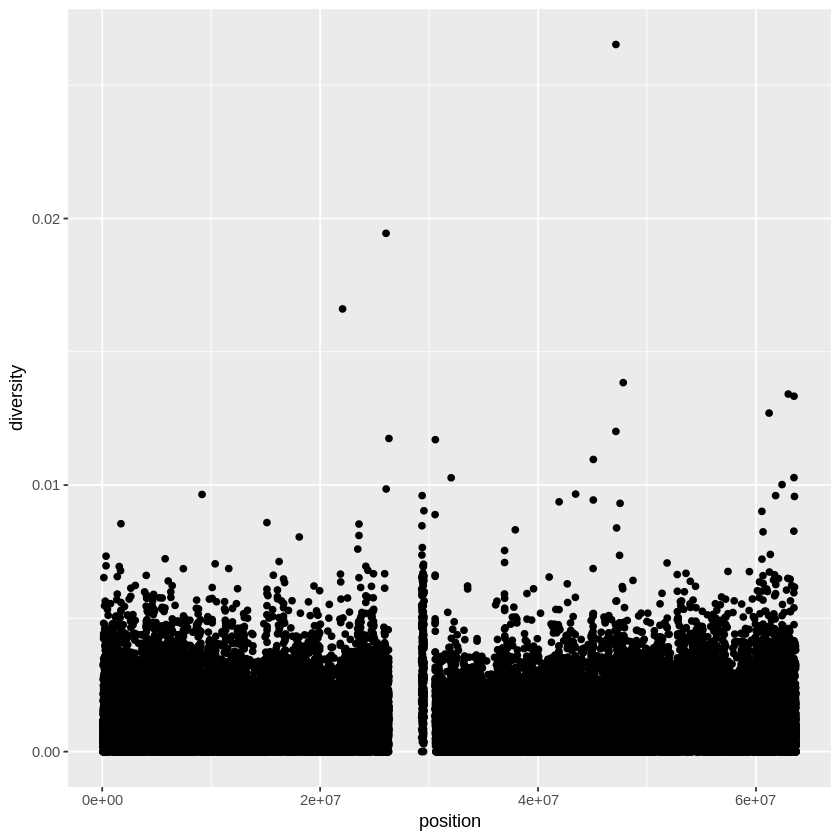

In [ ]:
ggplot(d, aes(x = position, y = diversity)) + geom_point()

In the plot, you might notice that the diversity estimates in the middle of the graph seem different. To figure out what's happening, ggplot2 makes it easy to explore the data visually.

To check if there’s any pattern, you can map another variable (called a confounder or explanatory variable) to a different aesthetic. For example, we can map the color of the points to the cent column. This column indicates whether the window is in the centromeric region of the chromosome.

Here’s how you can do it:

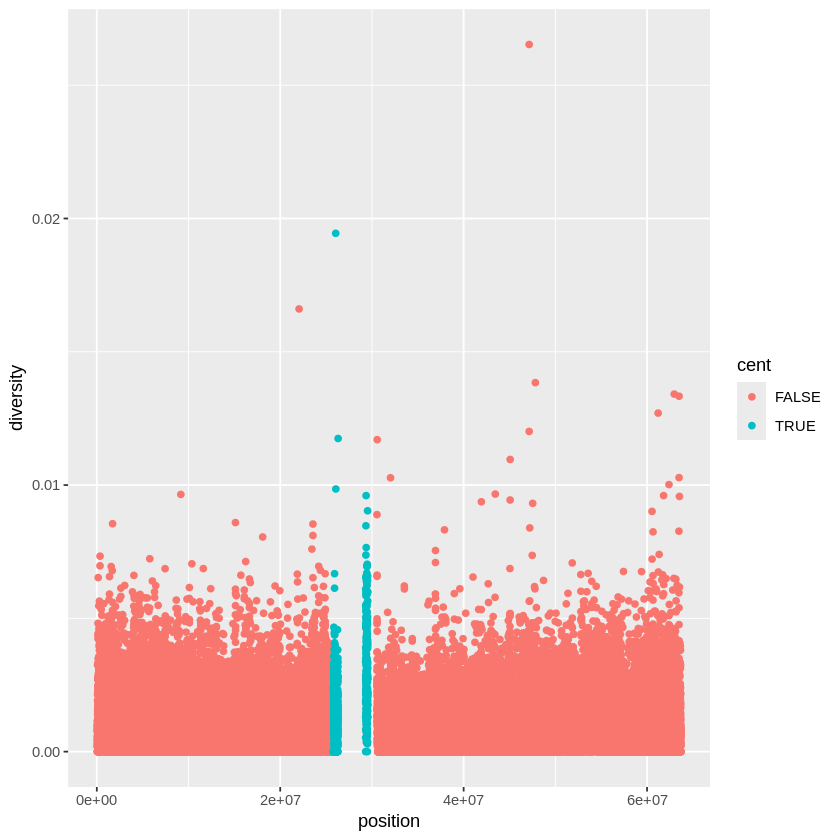

In [ ]:
ggplot(d) + geom_point(aes(x = position, y = diversity, color = cent))

In ggplot2, alpha controls the transparency of the points in your plot. The value of alpha can range from 0 to 1:

alpha = 1 means fully opaque (no transparency).

alpha = 0 means fully transparent (invisible).

Any value between 0 and 1 will give you semi-transparency.

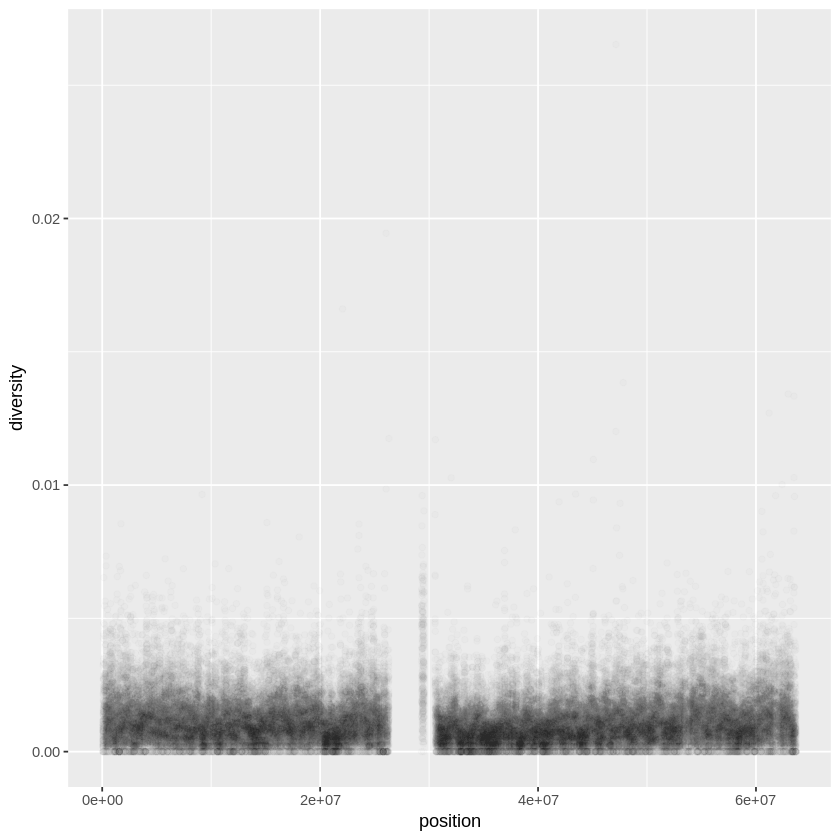

In [ ]:
ggplot(d) + geom_point(aes(x = position, y = diversity), alpha = 0.01)

Now we will calculate density using geom_density() calculates density. We calculate density using geom_density() to visualize the distribution of data and identify concentrations or patterns within the values.

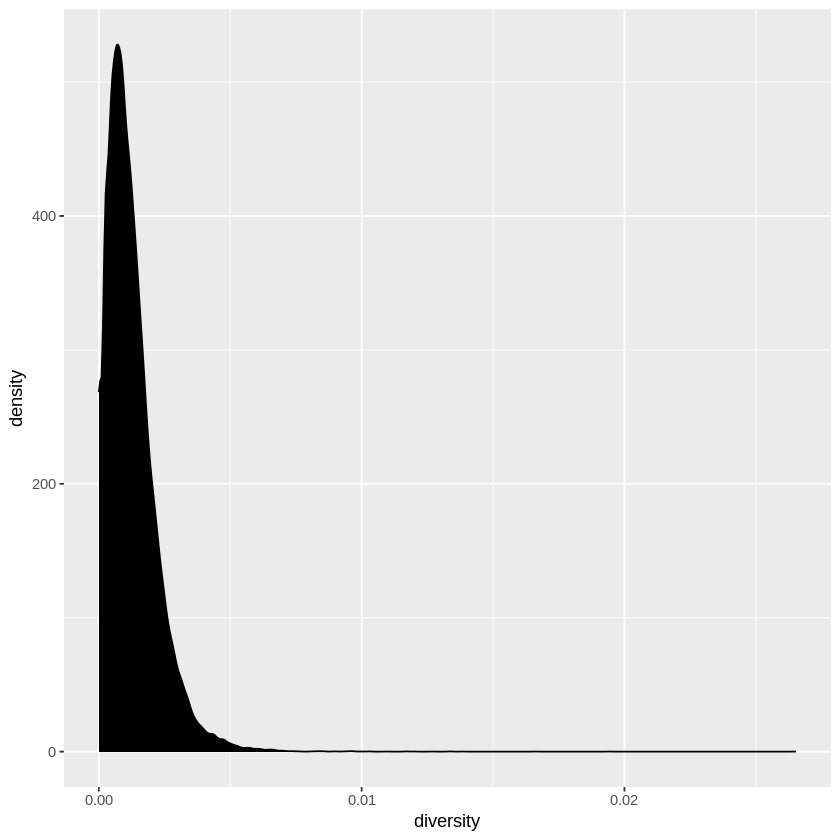

In [ ]:
ggplot(d) + geom_density(aes(x = diversity), fill = "black")

By default, ggplot2 draws densities with a line. Using fill=black makes the plot clearer. Mapping a color to a discrete column creates separate density plots for each group in the data.

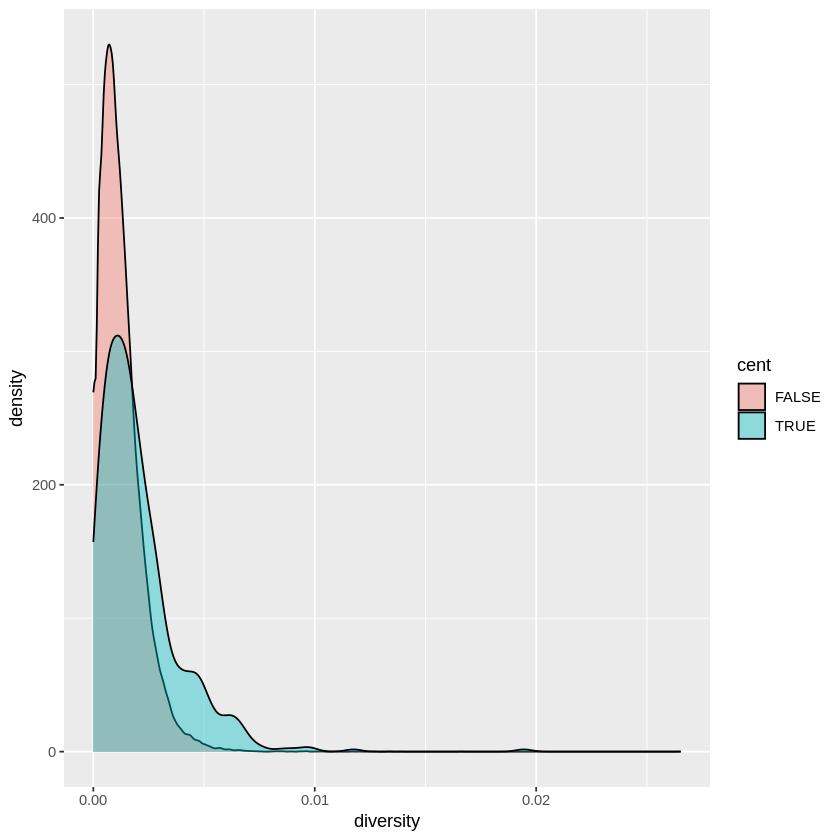

In [ ]:
ggplot(d) + geom_density(aes(x = diversity, fill = cent), alpha = 0.4)

# **Smoothing**

To investigate potential confounders like sequencing read depth, GC content, or batch effects, we can add smoothing lines to scatter plots in ggplot2.

This helps spot trends in high-dimensional genomic data. We'll use geom_smooth() to add a smoothing curve, mapping x and y aesthetics to examine relationships, like between depth and SNPs.

 Since we use the same x and y for both the scatter and smoothing, we can include them all within the ggplot() function.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


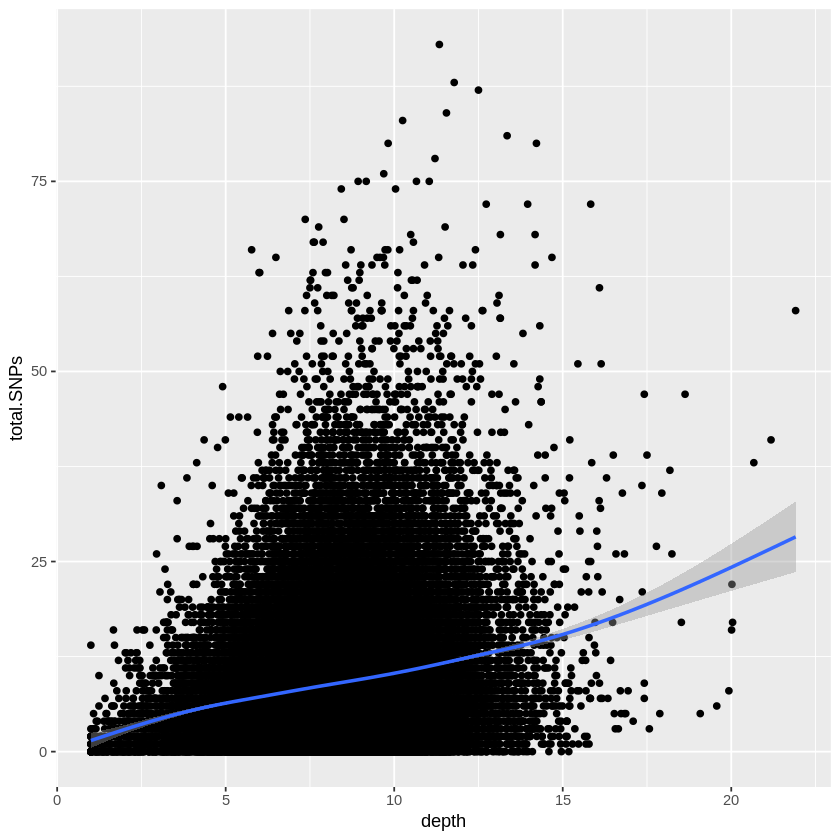

In [ ]:
ggplot(d, aes(x = depth, y = total.SNPs)) + geom_point() + geom_smooth()

By default, ggplot2 uses generalized additive models (GAM) to fit smoothed curves for datasets with more than 1000 rows.

You can specify a different smoothing method through the method argument in geom_smooth().

The default method also adds confidence intervals around the smoothed curve, though you can turn these off.

In the relationship between sequencing depth and SNPs, higher sequencing depth generally increases the power to detect and call SNPs.

However, this relationship is influenced by GC content, as regions with both high and low GC content tend to reduce read coverage.

You can explore this effect further through visualization.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


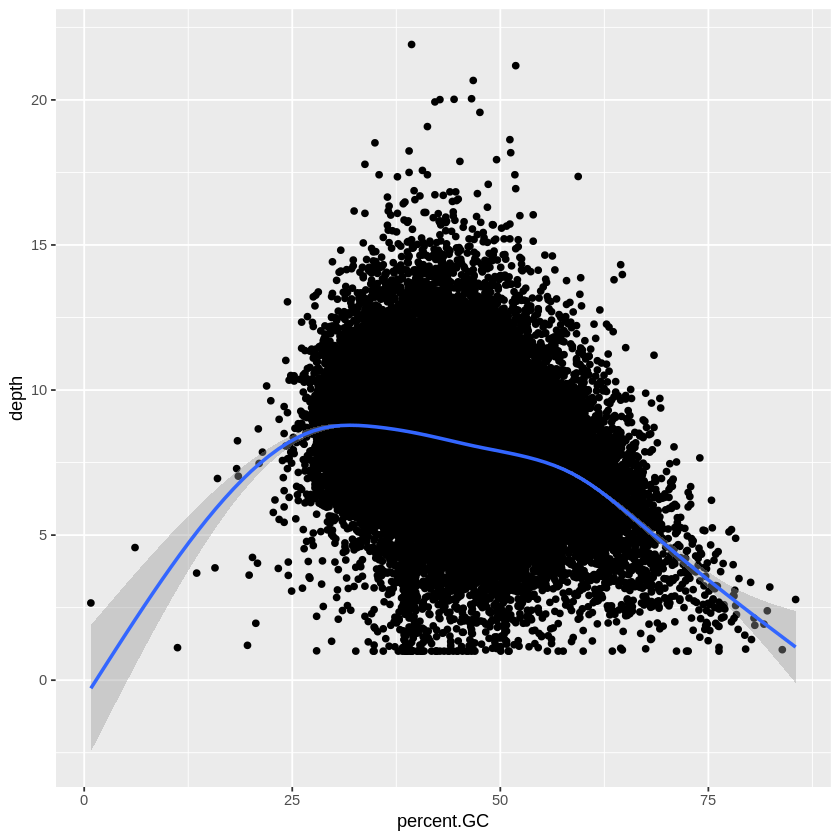

In [ ]:
ggplot(d, aes(x = percent.GC, y = depth)) + geom_point() + geom_smooth()

The trajectory of the smoothing curve shows that GC content affects sequencing depth in our data.

There is less evidence that low GC content leads to lower depth, as there are fewer windows with GC content below 25%.

However, we clearly observe a sharp drop in depth for GC content above 60%.

# **Faceting**

Faceting allows us to create multiple plots based on subsets of the data, which helps in visualizing patterns in different groups.

For faceting we will download data from  UCSC Genome Browser.

In [ ]:
mtfs <- read.delim("https://raw.githubusercontent.com/vsbuffalo/bds-files/master/chapter-08-r/motif_recombrates.txt",
    header = TRUE)
rpts <- read.delim("https://raw.githubusercontent.com/vsbuffalo/bds-files/master/chapter-08-r/motif_repeats.txt",
    header = TRUE)

Here’s a step-by-step process to merge these datasets and add the repeat information (from rpts) into the mtfs dataframe:

**Steps:**

1) Check the structure of both data frames: Ensure that both rpts and mtfs have columns chr (chromosome) and motif_start (start position of the motif).

2) Perform the merge: Merge the two data frames on the chr and motif_start columns. This will add the repeat information from the rpts dataframe into the mtfs dataframe based on matching positions.

3) Handle possible mismatches: If some motifs do not match any repeat, those rows will have NA in the newly added columns.

In [ ]:
# concatenating columns chr+motif_start into a single key string column can
# simplify merging
mtfs$pos <- paste(mtfs$chr, mtfs$motif_start, sep = "-")
rpts$pos <- paste(rpts$chr, rpts$motif_start, sep = "-")
# use match() to find where each of the mtfs$pos keys occur in the rpts$pos.
# We’ll create this indexing vector first before doing the merge
i <- match(mtfs$pos, rpts$pos)
# using this indexing vector we select out elements of rpts$name and merge
# these into mtfs:
mtfs$repeat_name <- rpts$name[i]
# same effect as above using match()’s results to i and use this directly
mtfs$repeat_name <- rpts$name[match(mtfs$pos, rpts$pos)]

Now let’s plot the relationship b/t recombination rate and distance to a motif using the mtfs from above.

`geom_smooth()` using formula = 'y ~ x'


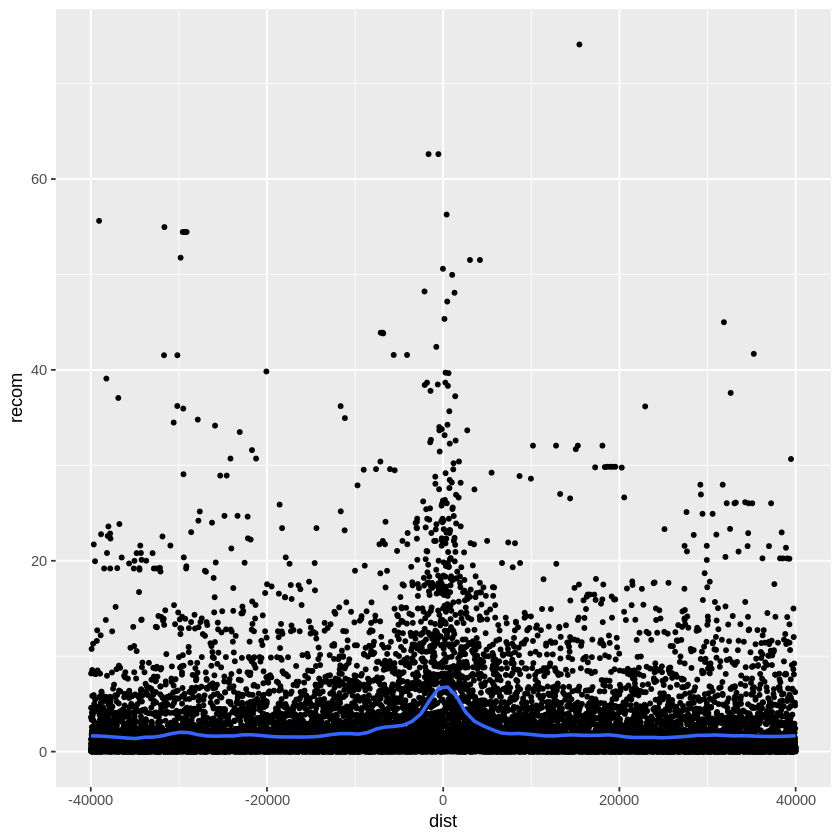

In [ ]:
p <- ggplot(mtfs, aes(x = dist, y = recom)) + geom_point(size = 1)
p <- p + geom_smooth(method = "loess", se = FALSE, span = 1/10)
print(p)

In simple terms, the geom_smooth() function by default tries to estimate a smooth trend in the data, but it often also includes standard error estimates as shaded areas around the curve. You can turn off these error bands and adjust the smoothing method to focus more on the overall trend, like using the loess method (local regression) for a smoother curve.

**Explore mtfs mtfs$motif column contains two variations of the sequence motif.**

In [ ]:
unique(mtfs$motif)

[1] "CCTCCCTGACCAC" "CCTCCCTAGCCAC"

do these motfis have any effects on local recombination?

let’s try grouping and coloring the loess curves by motif sequence

`geom_smooth()` using formula = 'y ~ x'


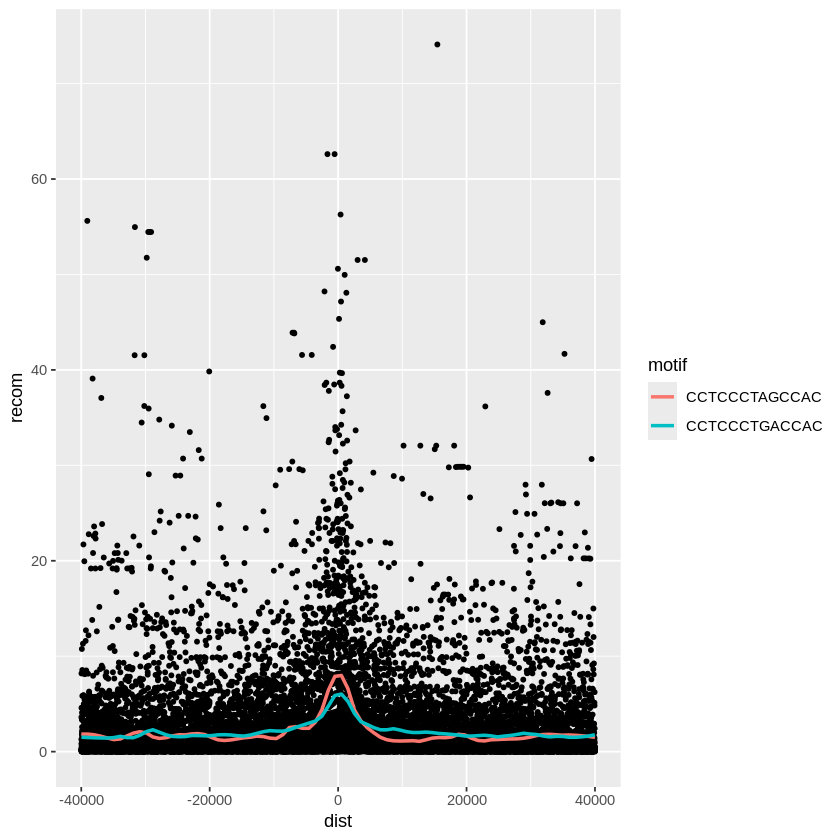

In [ ]:
ggplot(mtfs, aes(x = dist, y = recom)) + geom_point(size = 1) + geom_smooth(aes(color = motif),
    method = "loess", se = FALSE, span = 1/10)

notice we put the aes(color=motif) in the geom_smooth

another way to group in ggplot2 is via faceting or coditioning plotting (subplots)

`geom_smooth()` using formula = 'y ~ x'


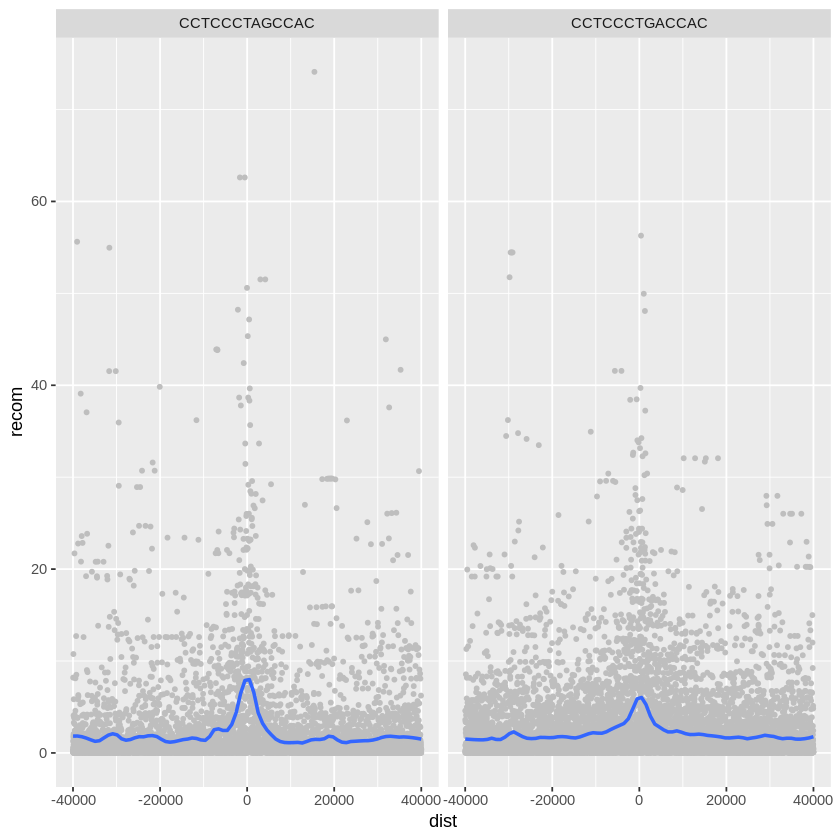

In [ ]:
p <- ggplot(mtfs, aes(x = dist, y = recom)) + geom_point(size = 1, color = "grey")
p <- p + geom_smooth(method = "loess", se = FALSE, span = 1/10)
p <- p + facet_wrap(~motif)
print(p)

ggplot2 has two facet methods: facet_wrap() and facet_grid()

facet_wrap() takes a factor column and creates a panel for each level and wraps horizontally

facet_grid() allows finder control of facets by allowing you to specify the columns to use for vertical and horz facets:

`geom_smooth()` using formula = 'y ~ x'


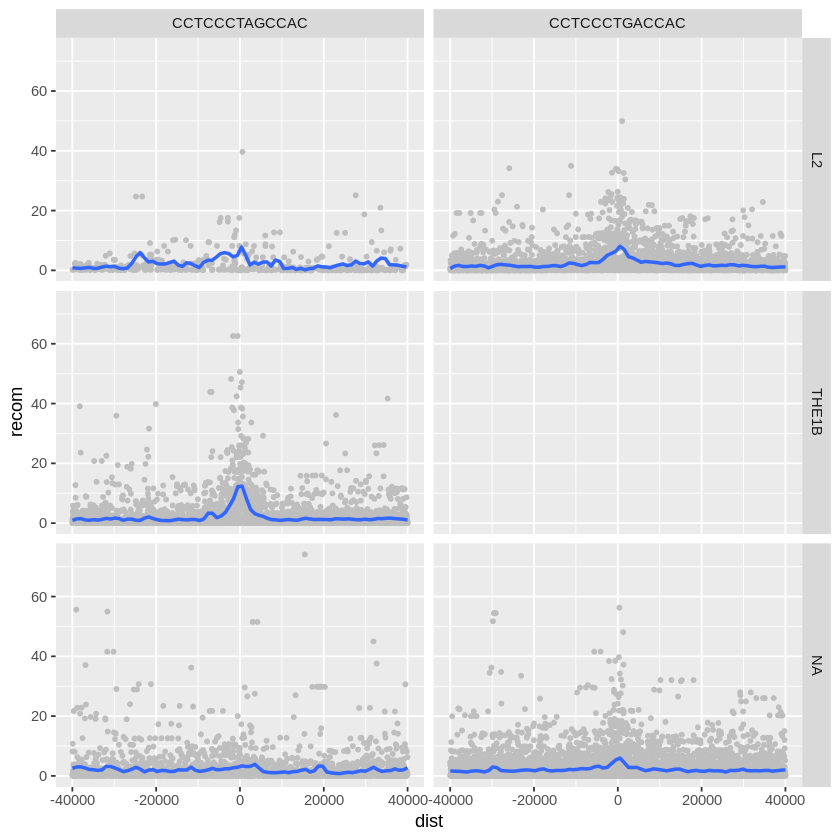

In [ ]:
p <- ggplot(mtfs, aes(x = dist, y = recom)) + geom_point(size = 1, color = "grey")
p <- p + geom_smooth(method = "loess", se = FALSE, span = 1/16)
p <- p + facet_grid(repeat_name ~ motif)
print(p)

CCTCCCTAGCCACon the THE1B repeat background has strong effect as does CCTCCCTGACCAC on the L2 repeat background. * you can get a sense of the data tha goes in this plot with:

In [ ]:
table(mtfs$repeat_name, mtfs$motif, useNA = "ifany")

       
        CCTCCCTAGCCAC CCTCCCTGACCAC
  L2              457          4110
  THE1B          4651             0
  <NA>           2908          7924

In simple terms, when you're using facet_wrap() or facet_grid() in ggplot2, you can use the ~ symbol to specify the model formula, which tells R how to separate or group your data for faceting.

`geom_smooth()` using formula = 'y ~ x'


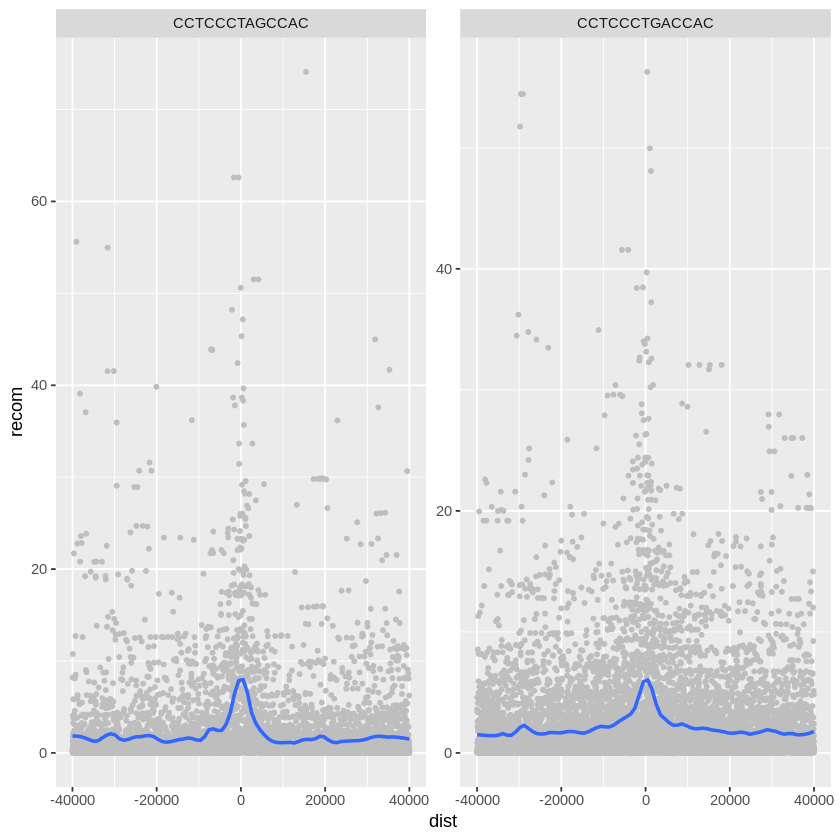

In [ ]:
p <- ggplot(mtfs, aes(x = dist, y = recom)) + geom_point(size = 1, color = "grey")
p <- p + geom_smooth(method = "loess", se = FALSE, span = 1/10)
p <- p + facet_wrap(~motif, scales = "free_y")
print(p)

Use facets to look at the data but group by chromosome

facet_wrap(~chr)

`geom_smooth()` using formula = 'y ~ x'


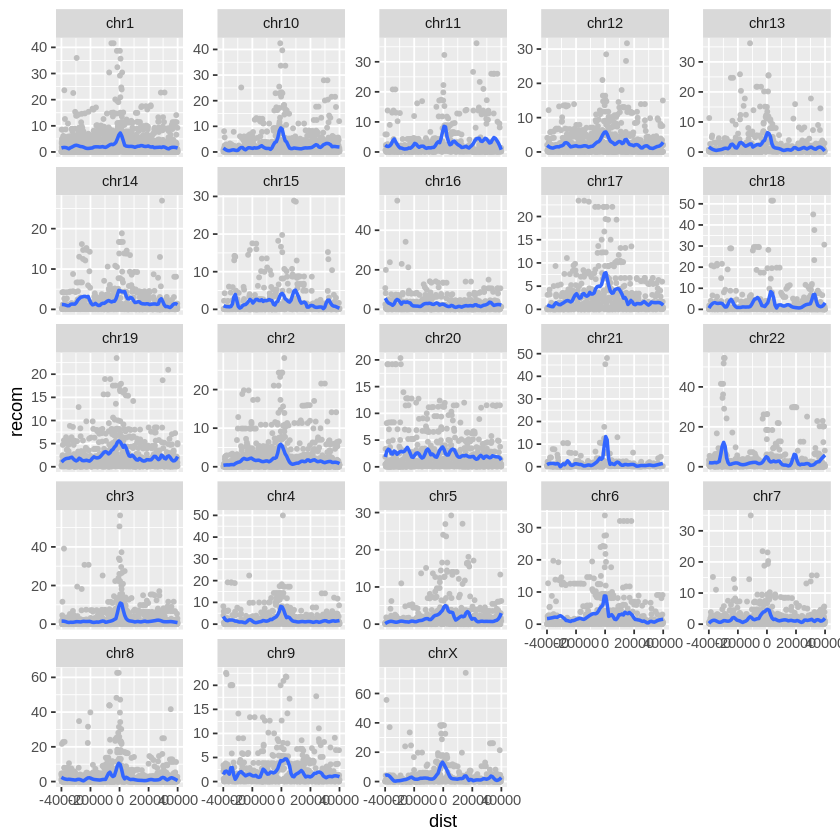

In [ ]:
p <- ggplot(mtfs, aes(x = dist, y = recom)) +
  geom_point(size = 1, color = "grey")

p <- p +
  geom_smooth(method = "loess", se = FALSE, span = 1/10)

p <- p +
  facet_wrap(~chr, scales = "free_y")

print(p)


# **Using theme() to customize specific elements**

`geom_smooth()` using formula = 'y ~ x'


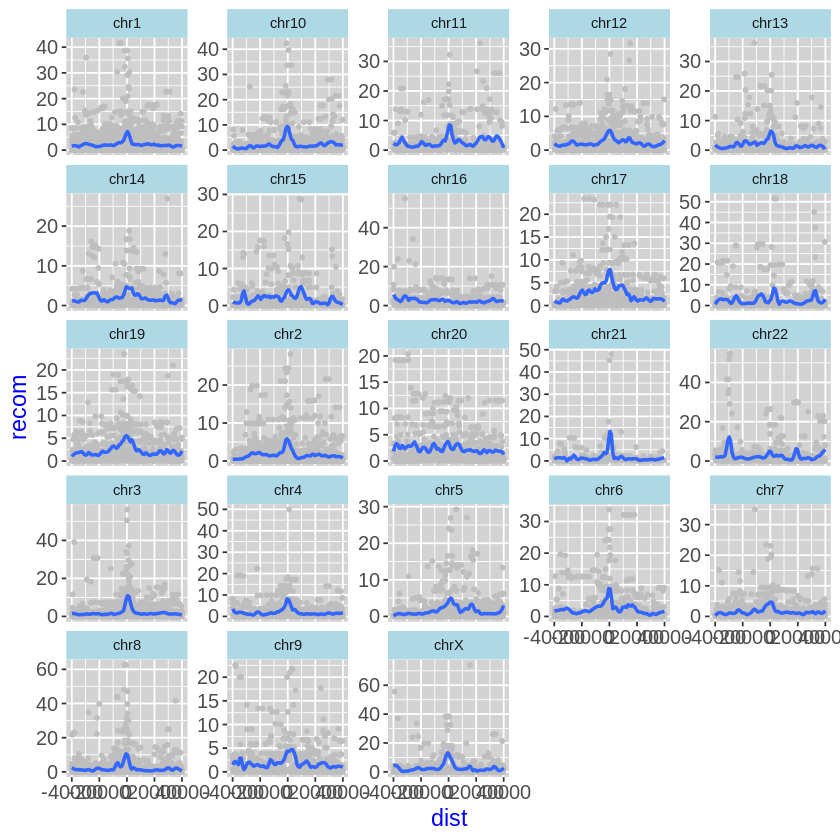

In [ ]:
p <- ggplot(mtfs, aes(x = dist, y = recom)) +
  geom_point(size = 1, color = "grey")

p <- p +
  geom_smooth(method = "loess", se = FALSE, span = 1/10)

p <- p +
  facet_wrap(~chr, scales = "free_y")

# Customizing with theme()
p <- p + theme(
  axis.title.x = element_text(size = 14, color = "blue"),
  axis.title.y = element_text(size = 14, color = "blue"),
  axis.text = element_text(size = 12),
  plot.title = element_text(size = 16, face = "bold"),
  panel.background = element_rect(fill = "lightgray"),
  strip.background = element_rect(fill = "lightblue")
)

print(p)

**Explanation:**

1) axis.title.x, axis.title.y: Modify the font size and color of the axis titles.

2) axis.text: Modify the font size of axis tick labels.

3) plot.title: Modify the font size and style of the plot title.

4) panel.background: Change the background color of the plotting area.

5)strip.background: Modify the background of facet labels (grouping by chromosome).

**Using Built-in ggplot2 Themes:**

ggplot2 provides a few built-in themes that you can easily apply to your plot.

For example:

1) theme_minimal(): Minimal design with a white background and no grid lines.

2) theme_classic(): Classic style with simple axes and no background grid.

3) theme_bw(): Black-and-white theme with white background and black grid lines.

`geom_smooth()` using formula = 'y ~ x'


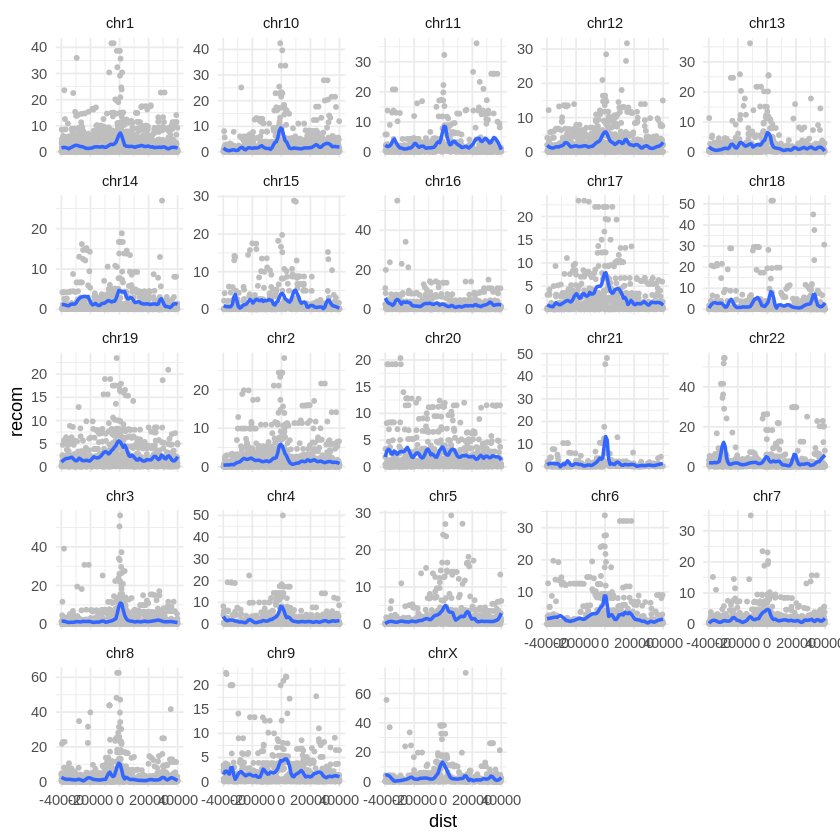

In [ ]:
p <- ggplot(mtfs, aes(x = dist, y = recom)) +
  geom_point(size = 1, color = "grey")

p <- p +
  geom_smooth(method = "loess", se = FALSE, span = 1/10)

p <- p +
  facet_wrap(~chr, scales = "free_y")

# Apply a built-in theme
p <- p + theme_minimal()  # You can also try theme_classic(), theme_bw(), etc.

print(p)

**Combining Custom Themes with Built-in Themes:**

You can also combine both built-in themes and custom adjustments. For example, applying theme_bw() and then customizing a few elements:

`geom_smooth()` using formula = 'y ~ x'


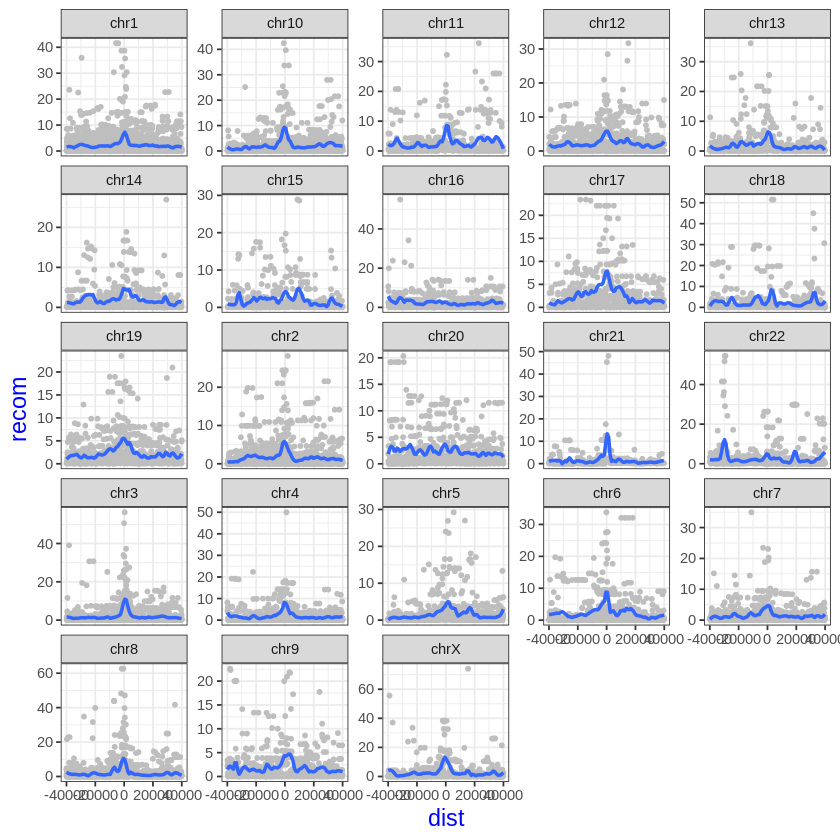

In [ ]:
p <- ggplot(mtfs, aes(x = dist, y = recom)) +
  geom_point(size = 1, color = "grey")

p <- p +
  geom_smooth(method = "loess", se = FALSE, span = 1/10)

p <- p +
  facet_wrap(~chr, scales = "free_y")

# Apply built-in theme_bw() and then customize
p <- p + theme_bw() +
  theme(
    axis.title.x = element_text(size = 14, color = "blue"),
    axis.title.y = element_text(size = 14, color = "blue")
  )

print(p)

This combines the black-and-white theme with custom axis title colors and sizes.